# General Overview

What are the types of speech?
- Nouns
- Adjectives
- Adverbs
- Verbs
- Pronouns
- Determinants
...

## POS Tagging

- Classifying words into their part of speech, sometimes simply called tagging
- Tagset: the collection of tags 
- You'll learn how to tag text automatically
- Key issue: words are often not just one part of speech - but understanding grammar helps

The pos_tag function: automatically tags a word tokenized object.

pos_tag(*text variable tokenized*)

- DT = determinant
- NN = noun
- VBZ = verb
- JJ = adjective

In [1]:
import nltk
from nltk import word_tokenize
text = word_tokenize("The dog is sleepy")
nltk.pos_tag(text)

[('The', 'DT'), ('dog', 'NN'), ('is', 'VBZ'), ('sleepy', 'JJ')]

In [2]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [3]:
help(nltk.pos_tag)

Help on function pos_tag in module nltk.tag:

pos_tag(tokens, tagset=None, lang='eng')
    Use NLTK's currently recommended part of speech tagger to
    tag the given list of tokens.
    
        >>> from nltk.tag import pos_tag
        >>> from nltk.tokenize import word_tokenize
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad."))
        [('John', 'NNP'), ("'s", 'POS'), ('big', 'JJ'), ('idea', 'NN'), ('is', 'VBZ'),
        ("n't", 'RB'), ('all', 'PDT'), ('that', 'DT'), ('bad', 'JJ'), ('.', '.')]
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad."), tagset='universal')
        [('John', 'NOUN'), ("'s", 'PRT'), ('big', 'ADJ'), ('idea', 'NOUN'), ('is', 'VERB'),
        ("n't", 'ADV'), ('all', 'DET'), ('that', 'DET'), ('bad', 'ADJ'), ('.', '.')]
    
    NB. Use `pos_tag_sents()` for efficient tagging of more than one sentence.
    
    :param tokens: Sequence of tokens to be tagged
    :type tokens: list(str)
    :param tagset: the tagset to be u

## Why is tagging useful?

- Similarity is often defined by being in the same part of speech category
- Also understanding these parts of speech allow us to understand predictive grammar 

In [4]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
print(text.similar('woman'))
print(text.similar('bought'))
print(text.similar('the'))

man time day year car moment world house family child country boy
state job place way war girl work word
None
made said done put had seen found given left heard was been brought
set got that took in told felt
None
a his this their its her an that our any all one these my in your no
some other and
None


# 2 Tagged Corpora

- Tuples: A tuple is a sequence of immutable (not changeable) objects.
    - tuple = (stuff, stuff)
- List: A sequence of changeable objects.
    - list = [stuff, stuff]

## 2.1 Representing Tagged Tokens

- Tagged datasets are often in the format "word/POS", which means we have to deal with them in some way other than `word_tokenize`. 
- The `str2tuple()` function: creates a tuple of the string of word/POS.  	

In [5]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

## 2.2 Reading Tagged Corpora

Here's what the Brown Corpus looks like:

`The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd / no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./.`

- However, there are other ways to tag, and thankfully `nltk` offers a way to deal with different formats for different corpora. 
- The `tagged_words()` function: reads in the various tag formats and converts them to tuples.

In [6]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

## 2.3 A Universal Part-of-Speech Tagset

What is AT? Or NP-TL?

You can use `tagset='universal'` to convert to a common tagset.

In [7]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

- NOUN (nouns)
- VERB (verbs)
- ADJ (adjectives)
- ADV (adverbs)
- PRON (pronouns)
- DET (determiners and articles)
- ADP (prepositions and postpositions)
- NUM (numerals)
- CONJ (conjunctions)
- PRT (particles)
- . (punctuation marks)
- X (a catch-all for other categories such as abbreviations or foreign words) 

In [8]:
#other languages: Chinese, Hindi, Portuguese, Spanish, Dutch, and Catalan
#you would need to download the full nltk resources
#nltk.corpus.indian.tagged_words()

In [9]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged) ##why two here in the loop?
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

## 2.4 Nouns

- Nouns have particular grammatical slots
- Often after a determinant, before a verb, or after an adjective (depends on language)
- N and NP are often used as tags, for noun and noun-proper for special names

In [10]:
#create bigrams of all the brown words
word_tag_pairs = nltk.bigrams(brown_news_tagged)

#loop over the (a, b) combination in word_tag_pairs, where a is the first word, b is the second word
#report the SECOND part of the a tuple - remember 0 is the first part
#that means we are taking the tag part
#only loop if the second word b is a noun
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']

In [11]:
fdist = nltk.FreqDist(noun_preceders)
print(fdist.most_common())
#[tag for (tag, _) in fdist.most_common()]

[('NOUN', 7959), ('DET', 7373), ('ADJ', 4761), ('ADP', 3781), ('.', 2796), ('VERB', 1842), ('CONJ', 938), ('NUM', 894), ('ADV', 186), ('PRT', 94), ('PRON', 19), ('X', 11)]


# 2.5 Verbs

- We can look at the most common verbs
- The use of words that can be both verb and noun

In [12]:
#most common verbs
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB'][:10]

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would']

In [13]:
#words that are multiple parts of speech
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

# 2.6 Adjectives and Adverbs

- Adjectives describe nouns
    - Used directly in front of a noun as a modifier (large pizza) or in predicates (the pizza is large)
- Adverbs modify verbs for time, place, manner, or direction (I made notes slowly)
    - Unfortunately, they can also modify adjectives (really!)

## 2.8 Exploring Tagged Corpora

- Let's do two things:
    - Pick a lexeme
    - See what words surround that lexeme (i.e., find most common collocate or bigram)
    - See what the most common word type is around that lexeme

In [14]:
#pick a corpus
brown_learned_text = brown.words(categories='learned')
#pick a lexeme and create bigrams
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [15]:
#create the tagged word set
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [16]:
#your turn let's try this on the chat corpus
from nltk.corpus import nps_chat

#pull all the words
chat_words = nps_chat.words()

#creat the bigrams - just view it
sorted(set(b for (a, b) in nltk.bigrams(chat_words) if a == 'you'))

['!!!',
 "'d",
 "'ll",
 "'re",
 "'ve",
 ',',
 ',,',
 ',,,',
 '.',
 '. . .',
 '..',
 '...',
 '....',
 '.....',
 '22',
 '?',
 '???',
 '????',
 'Americans',
 'I',
 'JOIN',
 'NICK',
 'PART',
 'PM',
 'Strapped',
 'U0',
 'U11',
 'U119',
 'U121',
 'U129',
 'U130',
 'U154',
 'U156',
 'U16',
 'U21',
 'U23',
 'U28',
 'U31',
 'U32',
 'U34',
 'U35',
 'U46',
 'U50',
 'U52',
 'U54',
 'U56',
 'U58',
 'U59',
 'U64',
 'U66',
 'U68',
 'U7',
 'U89',
 'U9',
 'U91',
 'a',
 'act',
 'actually',
 'actualy',
 'again',
 'ai',
 'all',
 'alone',
 'and',
 'any',
 'are',
 'as',
 'ask',
 'asking',
 'asshole',
 'at',
 'attend',
 'awake',
 'babe',
 'baby',
 'back',
 'be',
 'been',
 'behind',
 'believe',
 'both',
 'bro',
 'broke',
 'busted',
 'but',
 'buy',
 'ca',
 'caan',
 'call',
 'calling',
 'can',
 'cant',
 'capab;e',
 'caught',
 'change',
 'coudl',
 'could',
 'cry',
 'daft',
 'darlin',
 'deal',
 'dear',
 'did',
 'didnt',
 'dirrrrty',
 'do',
 'doin',
 'doing',
 'dont',
 'down',
 'eat',
 'either',
 'employed',
 'eve

In [17]:
#create a full list
nps_bigrams = (b for (a, b) in nltk.bigrams(chat_words) if a == 'you')

#create a frequency distribution
nps_fd = nltk.FreqDist(nps_bigrams)

#print out the most common
nps_fd.most_common()

[("'re", 25),
 ('can', 19),
 ('?', 18),
 ('do', 17),
 ('know', 15),
 ('are', 12),
 ('were', 11),
 ('want', 10),
 ('have', 9),
 ('a', 9),
 ('from', 9),
 ('like', 9),
 ('just', 7),
 ('PART', 7),
 ("'d", 7),
 ('got', 7),
 ('to', 6),
 ('.', 6),
 ('go', 6),
 ('had', 6),
 ('been', 6),
 ('should', 5),
 ('did', 5),
 ('dont', 5),
 ('make', 5),
 ('need', 5),
 (',', 5),
 ('in', 5),
 ('JOIN', 5),
 ('U121', 4),
 ('...', 4),
 ('sexy', 4),
 ('see', 4),
 ('and', 4),
 ('too', 4),
 ('lol', 4),
 ('didnt', 4),
 ('must', 4),
 ('ever', 4),
 ('mean', 4),
 ('not', 4),
 ('doin', 3),
 ('love', 3),
 ('guys', 3),
 ('I', 3),
 ('say', 3),
 ('wish', 3),
 ('i', 3),
 ('think', 3),
 ('the', 3),
 ('call', 3),
 ('feel', 3),
 ('take', 3),
 ('all', 3),
 ('hear', 3),
 ('could', 3),
 ('U156', 3),
 ('up', 3),
 ('gonna', 3),
 ('will', 3),
 ("'ve", 3),
 ('on', 3),
 ('but', 2),
 ('ca', 2),
 ('read', 2),
 ("'ll", 2),
 ('married', 2),
 ('U23', 2),
 ('then', 2),
 ('U9', 2),
 ('U35', 2),
 ('live', 2),
 ('very', 2),
 ('at', 2),
 ('ne

In [18]:
#create the tagged word set
nps_tagged = nps_chat.tagged_words(tagset = "universal")
tags = [b[1] for (a, b) in nltk.bigrams(nps_tagged) if a[0] == 'you']
fd = nltk.FreqDist(tags)
fd.tabulate(10)

VERB NOUN  ADV    .    X  ADP  DET  ADJ PRON  PRT 
 353   64   48   42   30   30   19   17   15   11 


In [19]:
#Another example analysis
#what words are ambiguous in a dataset?
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                 for (word, tag) in nps_tagged)
for word in sorted(data.conditions()):
     if len(data[word]) > 3:
         tags = [tag for (tag, _) in data[word].most_common()]
         print(word, ' '.join(tags))

' . NOUN PRT X ADP
. . X CONJ NOUN
/ CONJ NOUN X ADP
2 NUM PRT NOUN ADV
? . X NOUN ADV
a DET NOUN X ADP
as ADP ADV X NOUN
b NOUN VERB ADJ X
back ADV NOUN X PRT
damn X ADJ NOUN VERB
down ADP PRT ADV NOUN
im PRON VERB X NOUN
in ADP PRT NOUN X
like ADP VERB X ADV
n CONJ NOUN ADJ X ADP
no DET X ADV NOUN
of ADP ADV NOUN X VERB
off PRT ADP X ADV
one NOUN NUM CONJ X
pm VERB NOUN ADJ X
s PRT X NOUN ADJ
shore NOUN ADV X ADJ
that DET ADP ADV NOUN
there ADV DET X PRON
to PRT X ADP ADV
up PRT ADP X NOUN


# Dictionaries

- We mostly have been working with lists and tuples in Python, but another important data type is a dictionary. 
- Dictionaries use key-value pairs to store entries, much like a person's name and phone number might be stored in your phone.
- The key-value pairs can take any form - often we might use word-POS or word-frequency, but remember that lexical entries can get pretty complicated.
- Remember:
    - lists = []
    - tuples = ()
    - dictionaries = {}

In [20]:
#start a dictionary
pos = {}

#add some values
pos["swiss"] = "ADJ"
pos["cheese"] = "N"

#print it out
pos

{'swiss': 'ADJ', 'cheese': 'N'}

In [21]:
#notice how this prints differently than a list
print(list(pos))
print(list(pos.keys()))
print(list(pos.values()))
print(list(pos.items()))

['swiss', 'cheese']
['swiss', 'cheese']
['ADJ', 'N']
[('swiss', 'ADJ'), ('cheese', 'N')]


In [22]:
#each key can only have one entry
#but lots of values
pos["well"] = ["N", "V", "ADV", "ADJ"]
pos["well"]

['N', 'V', 'ADV', 'ADJ']

In [23]:
#creating a default dictionary, 
#to deal with new values so a user doesn't get errors
from collections import defaultdict
pos2 = defaultdict(list)
print(pos2)
pos2["well"] = "N"
print(pos2)
pos2["cheese"]
print(pos2)

defaultdict(<class 'list'>, {})
defaultdict(<class 'list'>, {'well': 'N'})
defaultdict(<class 'list'>, {'well': 'N', 'cheese': []})


Why use dictionaries?

- Creates a list of word-pos tags
- Can see all the possible POS for a word
- Can see all the possible words with a specific POS
- Allow for efficient lookup of information, rather than continuously looping

# 7 How to Determine the Category of a Word

- How do we even know what words should be anyway?
- Main areas:
    - Morphological clues
    - Syntactic clues
    - Semantic clues

## 7.1 Morphological Clues

- What is morpheme? 
- Smallest unit of meaning in a word
    - `ing` often a good clue as to a verb
    - `ly` often a good clue for adverbs
    - `s` is a tricky one

## 7.2 Syntactic Clues

- Word context, since word order is fairly important
- Grammatical slots usually indicate part of speech

## 7.3 Semantic Clues

- Context clues! 
- Usually surrounding words to indicate the POS, based on their meaning
- Example:

No matter where you go, the Internet is following you. Almost every portable device is being made with an Internet connection. Most new TVs and many other appliances come with Internet connections as well. The Internet is truly brapuous. 

## Combining Clues

- Most tagsets have the basic categories: noun, verb, adjective, etc.
- Some tagsets include more fine grained categories such as:
    - Form 	Category 	Tag
    - go 	base 	VB
    - goes 	3rd singular present 	VBZ
    - gone 	past participle 	VBN
    - going 	gerund 	VBG
    - went 	simple past 	VBD
- These are often considered morpho-syntactic rules: the affixes/morphemes that change for a word based on syntactic role. 
- The usefulness of this type of information will depend on your goals. 

# Automatic Tagging

- Instead of using pre-tagged corpora, let's try tagging things ourselves. 
- The part of speech will often depend on the context of the sentence, so we often use tagging at the sentence level. 
- The Brown corpus has tagged information, so we can try to tag it and compare our results to hand tagged information. 


In [24]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

## 4.1 The Default Tagger

- We can start by assigning everything to the most common option, usually `NN` for noun.
- Obviously, this won't be very good, but it's a place to start.
- Generally, after you process a lot of text, the "unseen" words will be nouns (as other words repeat a lot), so a default tagger can help get those right and easily. 

In [25]:
##create a function to give it the default of NN
default_tagger = nltk.DefaultTagger('NN')
##assign that to tokenized Brown words
tokens = brown.words(categories = "news")
default_tagger.tag(tokens)

[('The', 'NN'),
 ('Fulton', 'NN'),
 ('County', 'NN'),
 ('Grand', 'NN'),
 ('Jury', 'NN'),
 ('said', 'NN'),
 ('Friday', 'NN'),
 ('an', 'NN'),
 ('investigation', 'NN'),
 ('of', 'NN'),
 ("Atlanta's", 'NN'),
 ('recent', 'NN'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'NN'),
 ('``', 'NN'),
 ('no', 'NN'),
 ('evidence', 'NN'),
 ("''", 'NN'),
 ('that', 'NN'),
 ('any', 'NN'),
 ('irregularities', 'NN'),
 ('took', 'NN'),
 ('place', 'NN'),
 ('.', 'NN'),
 ('The', 'NN'),
 ('jury', 'NN'),
 ('further', 'NN'),
 ('said', 'NN'),
 ('in', 'NN'),
 ('term-end', 'NN'),
 ('presentments', 'NN'),
 ('that', 'NN'),
 ('the', 'NN'),
 ('City', 'NN'),
 ('Executive', 'NN'),
 ('Committee', 'NN'),
 (',', 'NN'),
 ('which', 'NN'),
 ('had', 'NN'),
 ('over-all', 'NN'),
 ('charge', 'NN'),
 ('of', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('deserves', 'NN'),
 ('the', 'NN'),
 ('praise', 'NN'),
 ('and', 'NN'),
 ('thanks', 'NN'),
 ('of', 'NN'),
 ('the', 'NN'),
 ('City', 'NN'),
 ('of', 

In [26]:
##let's see if that's any good
##evaluate how well the tagger words against a known sets
default_tagger.evaluate(brown_tagged_sents)
##this number represents the proportion match of the 
##words in the tagged set to the words in the comparison pre-tagged set. 

0.13089484257215028

## 4.2 The Regular Expression Tagger

- We can match to common line endings and other known patterns.
- Remember that the `r` begins the regex when you are going to use special characters like \
- This set will be matched in order - so if `ing` is present, it gets marked and moves on.


In [27]:
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                     # nouns (default)
 ]

In [28]:
##make a function for regex tagger
regexp_tagger = nltk.RegexpTagger(patterns)
##apply that function 
##remember that tokens is untagged brown words
regexp_tagger.tag(tokens)

[('The', 'NN'),
 ('Fulton', 'NN'),
 ('County', 'NN'),
 ('Grand', 'NN'),
 ('Jury', 'NN'),
 ('said', 'NN'),
 ('Friday', 'NN'),
 ('an', 'NN'),
 ('investigation', 'NN'),
 ('of', 'NN'),
 ("Atlanta's", 'NN$'),
 ('recent', 'NN'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', 'NN'),
 ('no', 'NN'),
 ('evidence', 'NN'),
 ("''", 'NN'),
 ('that', 'NN'),
 ('any', 'NN'),
 ('irregularities', 'VBZ'),
 ('took', 'NN'),
 ('place', 'NN'),
 ('.', 'NN'),
 ('The', 'NN'),
 ('jury', 'NN'),
 ('further', 'NN'),
 ('said', 'NN'),
 ('in', 'NN'),
 ('term-end', 'NN'),
 ('presentments', 'NNS'),
 ('that', 'NN'),
 ('the', 'NN'),
 ('City', 'NN'),
 ('Executive', 'NN'),
 ('Committee', 'NN'),
 (',', 'NN'),
 ('which', 'NN'),
 ('had', 'NN'),
 ('over-all', 'NN'),
 ('charge', 'NN'),
 ('of', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('deserves', 'VBZ'),
 ('the', 'NN'),
 ('praise', 'NN'),
 ('and', 'NN'),
 ('thanks', 'NNS'),
 ('of', 'NN'),
 ('the', 'NN'),
 ('City', 'NN'),
 (

In [29]:
##evaluate how well the tagger words against a known sets
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

## 4.3 The Lookup Tagger

- Using some previously known information, we can create a dictionary of key-value pairs.
- These key-value pairs are word-POS.
- Then we can use those words to tag other sets.


In [42]:
##create a frequency distribution of the target word set
fd = nltk.FreqDist(brown.words(categories='news'))
##pull out the top 100 words
most_freq_words = fd.most_common(100)
#print(most_freq_words)[:10]
##create a conditional frequency distribution of the 
##known word set, remember this is going to be word-pos
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))

In [31]:
##create a dictionary of the words 
##pull the max word-pos combination from our known set
##but only for words in our target word set
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
print(likely_tags)

{'the': 'AT', ',': ',', '.': '.', 'of': 'IN', 'and': 'CC', 'to': 'TO', 'a': 'AT', 'in': 'IN', 'for': 'IN', 'The': 'AT', 'that': 'CS', '``': '``', 'is': 'BEZ', 'was': 'BEDZ', "''": "''", 'on': 'IN', 'at': 'IN', 'with': 'IN', 'be': 'BE', 'by': 'IN', 'as': 'CS', 'he': 'PPS', 'said': 'VBD', 'his': 'PP$', 'will': 'MD', 'it': 'PPS', 'from': 'IN', 'are': 'BER', ';': '.', 'an': 'AT', 'has': 'HVZ', '--': '--', 'had': 'HVD', 'who': 'WPS', 'have': 'HV', 'not': '*', 'Mrs.': 'NP', 'were': 'BED', 'this': 'DT', 'which': 'WDT', 'would': 'MD', 'their': 'PP$', 'been': 'BEN', 'they': 'PPSS', 'He': 'PPS', 'one': 'CD', 'I': 'PPSS', 'but': 'CC', 'its': 'PP$', 'or': 'CC', ')': ')', 'more': 'AP', 'Mr.': 'NP', '(': '(', 'up': 'RP', 'all': 'ABN', 'out': 'RP', 'last': 'AP', 'two': 'CD', 'other': 'AP', ':': ':', 'new': 'JJ', 'first': 'OD', 'than': 'IN', 'year': 'NN', 'A': 'AT', 'about': 'IN', 'there': 'EX', 'when': 'WRB', 'home': 'NN', 'after': 'IN', 'In': 'IN', 'also': 'RB', 'It': 'PPS', 'over': 'IN', 'into': 'I

In [32]:
##create the baseline_tagger function
##using model of our likely words
##and backoff which is adding the default guess of NN rather than none
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))
##examine how well it tags versus the known words
baseline_tagger.evaluate(brown_tagged_sents)

0.5817769556656125

## 4.4 Evaluation

- In each of these, we used `.evaluate()` to determine how accurate our tagger was. 
- In this function, you put in a set with known data (brown_tagged_sents):
    - First, the tagger guesses based on the type of tagger.
    - Second, these guesses are compared to the real answer.
    - Last, the percent correct value is calculated. 

- Evaluation is key, as knowing how well your functions work helps you understand other output. 
- Further, errors at the beginning of an analysis can lead to more errors later. 
- It is common to evaluate your tagger or other functions against a human coded "gold standard". 

## 5.1 Unigram Tagging

- For each word, pick the most common POS for that word.
- For example, the word *frequent* would be assigned to adjective, even though it can be a noun.
- Works much like a lookup tagger, but this system allows us to do tag training. 
    -  Training occurs where we look at each POS and store the most likely tag for each word in a dictionary. 

In [33]:
##create a unigram tagger function 
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
##lets see what it does 
unigram_tagger.tag(tokens)[:50]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.'),
 ('The', 'AT'),
 ('jury', 'NN'),
 ('further', 'JJR'),
 ('said', 'VBD'),
 ('in', 'IN'),
 ('term-end', 'NN'),
 ('presentments', 'NNS'),
 ('that', 'CS'),
 ('the', 'AT'),
 ('City', 'NN-TL'),
 ('Executive', 'NN-TL'),
 ('Committee', 'NN-TL'),
 (',', ','),
 ('which', 'WDT'),
 ('had', 'HVD'),
 ('over-all', 'JJ'),
 ('charge', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('election', 'NN'),
 (',', ','),
 ('``', '``'),
 ('deserves', 'VBZ'),
 ('the', 'AT'),
 ('praise', 'NN')]

In [34]:
##what's the performance?
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

## 5.2 Separating the Training and Testing Data

- You should not train and test on the same dataset (that's cheating!)
- Often people train on 90% of data and test on last 10%
- Here's a way to do that split:

In [44]:
##figure out where the split is
size = int(len(brown_tagged_sents) * 0.9)
print(size)
##break apart the data based on that split
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

4160


In [36]:
##create a function (training) on the first part of the data
unigram_tagger = nltk.UnigramTagger(train_sents)
##test on the second part
unigram_tagger.evaluate(test_sents)

0.8121200039868434

## 5.3 General N-Gram Tagging

- Unigrams takes just the best guess given the word in isolation.
- N-gram taggers instead look at n-1 tokens to disambiguate word choice in context. 

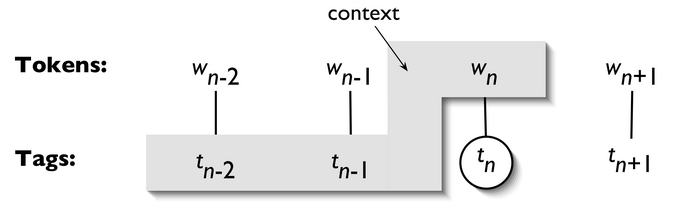

In [37]:
from IPython.display import Image
Image("lesson5-tag.png")

In [38]:
##create the function to tag (training)
bigram_tagger = nltk.BigramTagger(train_sents)
##try tagging new stuff
bigram_tagger.tag(brown_sents[4203])

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [39]:
##how good is this tagger?
bigram_tagger.evaluate(test_sents)

0.10206319146815508

- As you increase n in the n-gram, the context specificity increases.
- That means that the likelihood of seeing each specific combination decreases.
- Sparse data problem, meaning that specific algorithms might get the most accurate answer, but often don't have enough data to get to the most precise answer. 
- One solution is to combine taggers:

In [49]:
##default to noun
t0 = nltk.DefaultTagger('NN')
##single words in context, go back to noun if necessary
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
##double words in context, back up to single words
t2 = nltk.BigramTagger(train_sents, backoff=t1)
##how accurate is that
t2.evaluate(test_sents)

0.8452108043456593

Be sure to read the sections 5.6 and 5.7 on how to save the trainers you use for the future 
- Big training data is useful!
- It takes forever!
- So save it to use in the future